**THIS DOC IS BEING USED FOR THE TEST GRAPHS**

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
turkish_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00638/Acoustic%20Features.csv")
colnames(turkish_data) <- c("Class", "RMS_Energy_Mean", "Low_Energy_Mean", "Fluctuation_Mean", "Tempo_Mean", 
                            "MFCC_Mean1", "MFCC_Mean2", "MFCC_Mean3", "MFCC_Mean4", "MFCC_Mean5", "MFCC_Mean6",
                            "MFCC_Mean7", "MFCC_Mean8", "MFCC_Mean9", "MFCC_Mean10", "MFCC_Mean11", "MFCC_Mean12",
                            "MFCC_Mean13", "Roughness_Mean", "Roughness_Slope", "Zero_Crossing_Rate_Mean",
                            "Attack_Time_Mean", "Attack_Time_Slope", "Roll_Off_Mean", "Event_Density_Mean", "Pulse_Clarity_Mean",
                            "Brightness_Mean", "Spectral_Centroid_Mean", "Spectral_Spread_Mean", "Spectral_Skewness_Mean",
                            "Spectral_Kurtosis_Mean", "Spectral_Flatness_Mean", "Entropy_of_Spectrum_Mean", "Chromagram_Mean1",
                            "Chromagram_Mean2", "Chromagram_Mean3", "Chromagram_Mean4", "Chromagram_Mean5", "Chromagram_Mean6",
                            "Chromagram_Mean7", "Chromagram_Mean8", "Chromagram_Mean9", "Chromagram_Mean10", "Chromagram_Mean11",
                            "Chromagram_Mean12", "Harmonic_Change_Detection_Function_Mean", "Harmonic_Change_Detection_Function_Std",
                            "Harmonic_Change_Detection_Function_Slope", "Harmonic_Change_Detection_Function_Period_Freq", 
                            "Harmonic_Change_Detection_Function_Period_Amp", "Harmonic_Change_Detection_Function_Period_Entropy")
turkish_data <- mutate(turkish_data, Class = as_factor(Class))

Rows: 400 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (50): _RMSenergy_Mean, _Lowenergy_Mean, _Fluctuation_Mean, _Tempo_Mean, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
set.seed(6969)

turkish_split <- initial_split(turkish_data, prop = 0.8, strata = Class)
turkish_training <- training(turkish_split)
turkish_testing <- training(turkish_split)

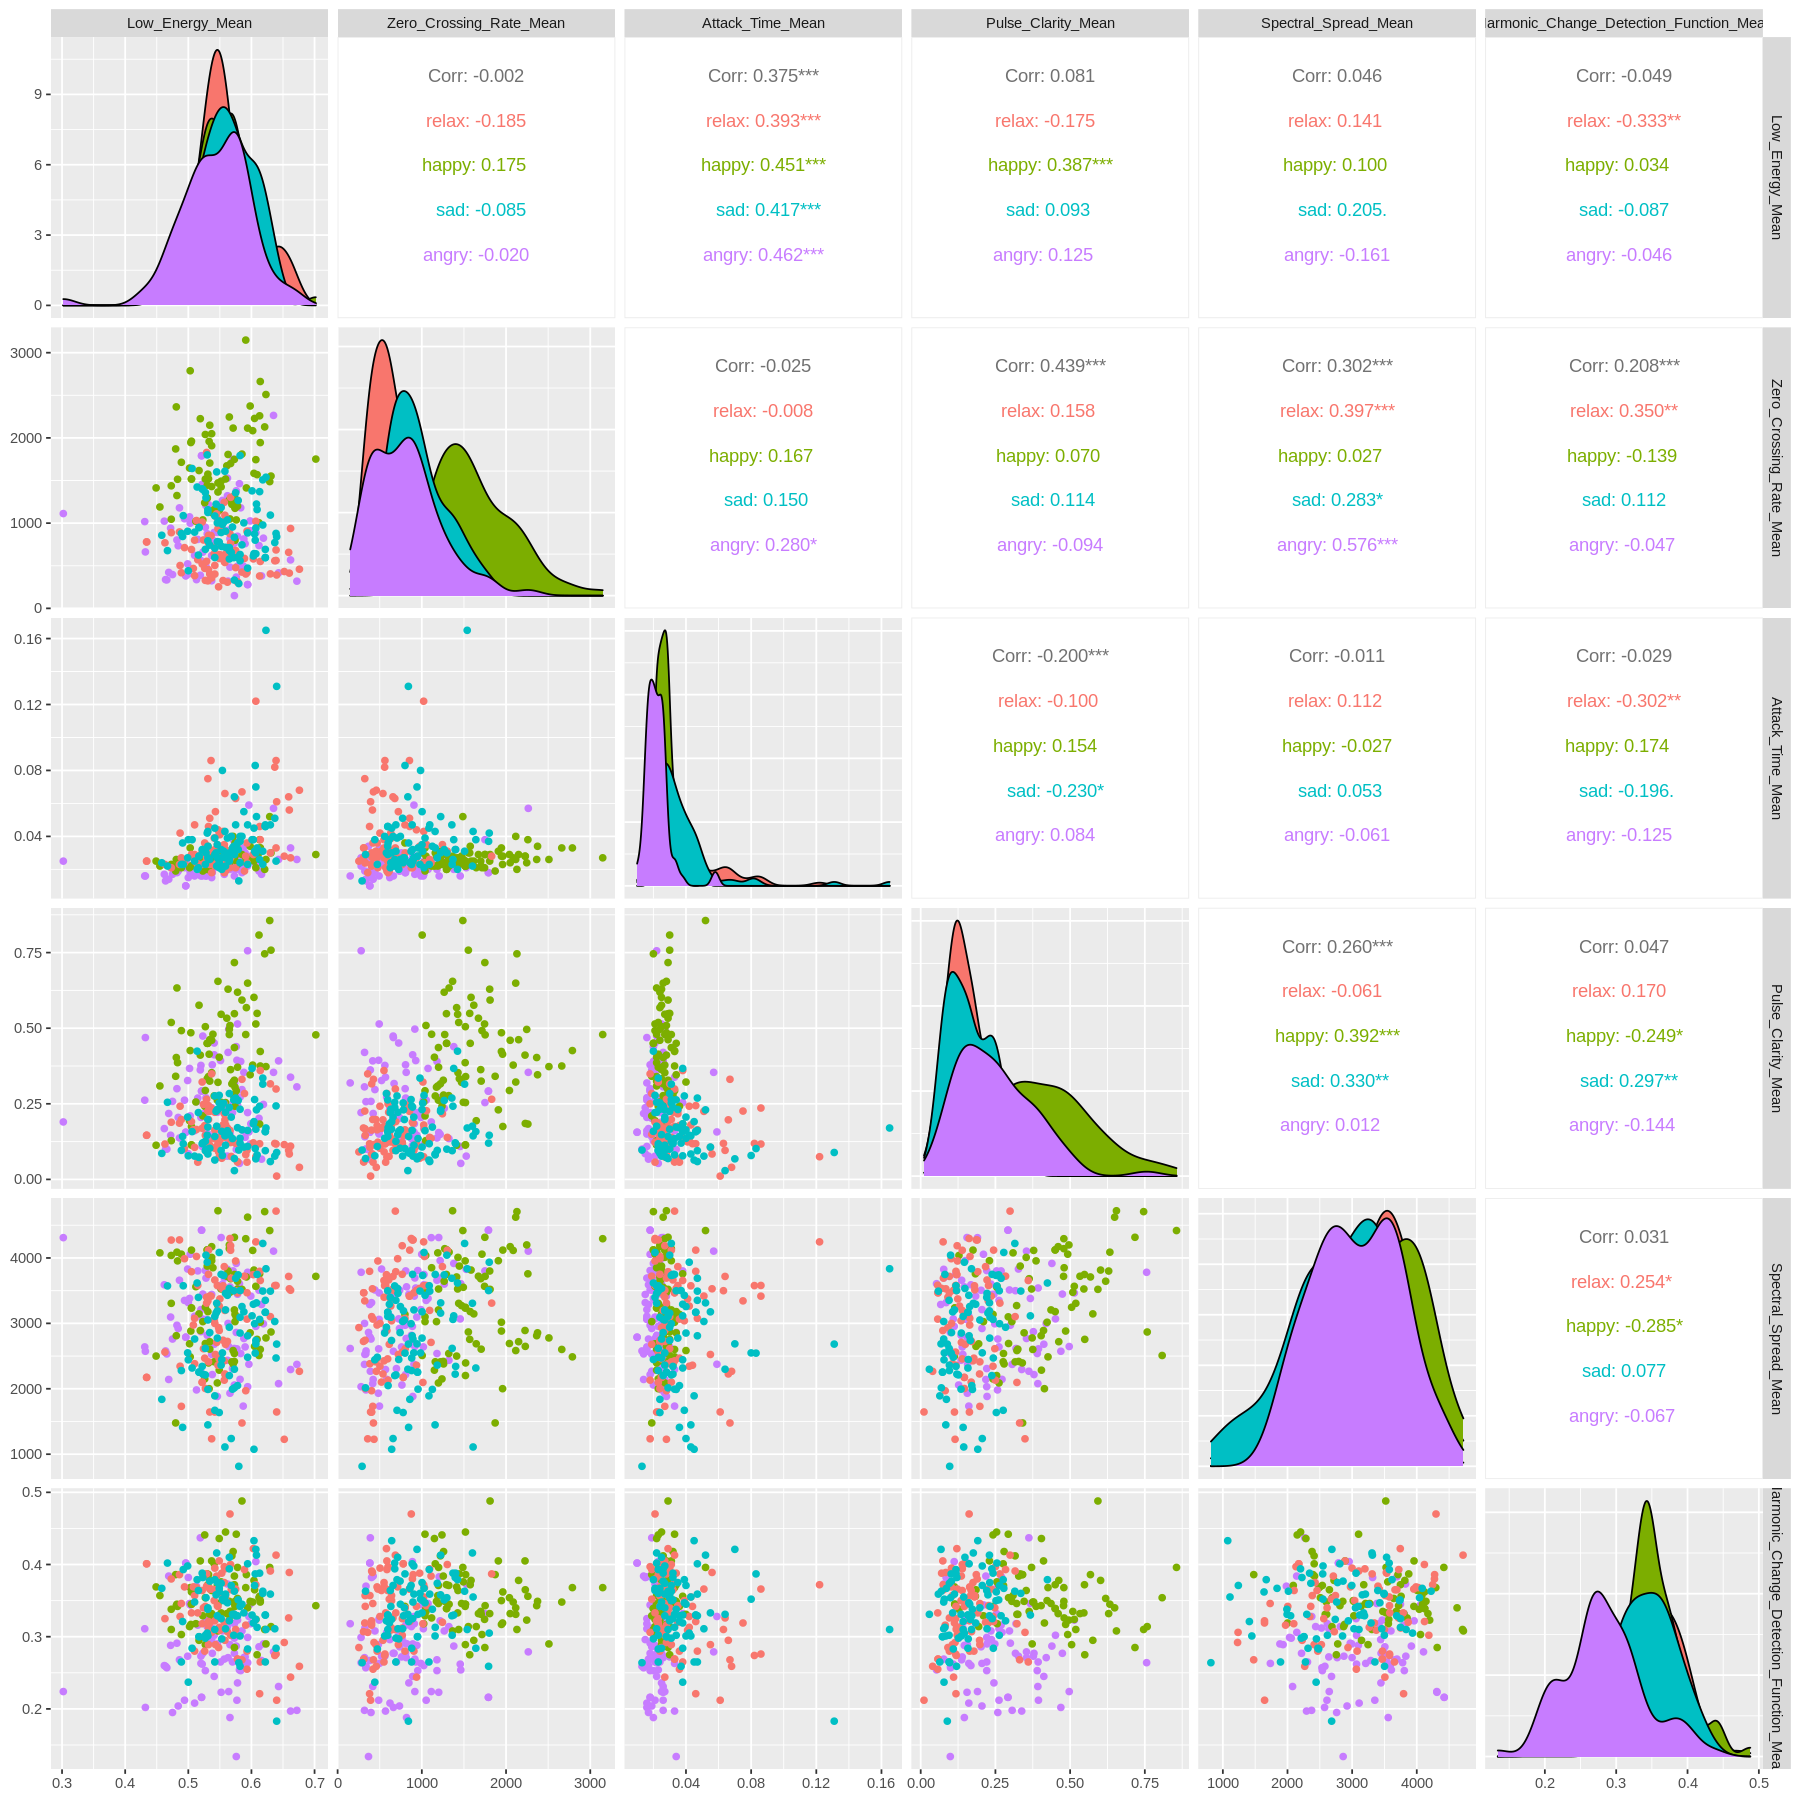

In [18]:
options(repr.plot.width = 15, repr.plot.height = 15)

turkish_smol <- turkish_training |>
    select(Class, Low_Energy_Mean, Zero_Crossing_Rate_Mean, Attack_Time_Mean, 
           Pulse_Clarity_Mean, Spectral_Spread_Mean, Harmonic_Change_Detection_Function_Mean)
turkish_plot <- ggpairs(data = turkish_smol, columns = 2:7, ggplot2::aes(colour=Class))
turkish_plot